                        -- --- In God we trust, everyone else must bring data -----

Evolution and change are the essence of life. With each change we make, we generate a wealth of data, providing us with the opportunity to learn as we evolve. A/B testing is a powerful tool to ensure our progress is deliberate and in the right direction, rather than taking one step forward and two steps back.

A/B testing, also known as split or bucket testing, is a method for comparing two versions of a webpage, app, or strategy to determine which performs better. By collecting reliable data on how changes impact key metrics, we can make informed decisions, ensuring that our strategies are driven by evidence rather than assumptions.



## Task
Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

The companies are interested in answering two questions:

The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

*Data dictionary:*

    Index : Row index
    user id: User ID (unique)
    test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
    converted: If a person bought the product then True, else is False
    total ads: Amount of ads seen by person
    most ads day: Day that the person saw the biggest amount of ads
    most ads hour: Hour of day that the person saw the biggest amount of ads
    
*Test key characteristics:*

    Controlled delibrate experiment
    Based on randomized set of users
    Defined hypothesis and ability to measure the succes
    There is a control group with default experience and at least one test group with new experience
*Test Process:*

    1.Import Packages
    2.EDA
    3.Statistical tests implementation 
    4.Analyse the results
    5.Recommend relevant decisions to run the business

### Import necessary Libraries

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.info() # to check if id are column is unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [5]:
# drop the index and u nnecesary column
df.drop(columns = ['Unnamed: 0', 'user id'], inplace = True)
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


### Exploratory Data Analysis

In [6]:
df.shape

(588101, 5)

In [7]:
df.dtypes

test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [8]:
df.isna().sum()

test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total ads,588101.0,24.820876,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads hour,588101.0,14.469061,4.834634,0.0,11.0,14.0,18.0,23.0


In [11]:
# Unique value in categorical cólumn
cat_column = ["test group", "most ads day", "converted"]
for col in cat_column:
    coll = col.capitalize()
    print(f"{coll}:" ,df[col].unique())

Test group: ['ad' 'psa']
Most ads day: ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
Converted: [False  True]


In [12]:
# convert 'Converted' to integer
df['converted'] = df['converted'].astype(int)
df.dtypes

test group       object
converted         int32
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

## Statistical Testing and Interpretation 

Since we expect test group to have higher conversion rate than the control group, One tail test is appropriate. And in this case I am only interested in knowing if the Ads are better alternative to PSA else we stop the asd and channel our resources to other investment

In cases where it is paramount to know if it perform worse or better (Or if there is a significant  difference the two. then Two tail test is appropriate ie Ho: M1 = M2

*H0*: M1 <= M2 The test gp conversion rate is less than or equals control gp

*H1*: M1 > M2 the test group performs significantly better.

In [13]:
# Setting up ou
control_group =df[df['test group']== 'psa'] 
test_group = df[df['test group'] == "ad"]

t_stat, p_val = stats.ttest_ind(test_group['converted'], control_group['converted'], alternative='greater')
print(f"Test Group Analysis - T-statistic: {t_stat}, P-value:{p_val}")

Test Group Analysis - T-statistic: 7.37040597428566, P-value:8.516526313915632e-14


##### Acceptance criteria

In [14]:
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between the ad and the 'psa' groups")
else:
    print("Fail to reject the null Hypothesis: There is no significant difference in conversion rates between the 'ad' and 'psa'")

Reject the null hypothesis: There is a significant difference in conversion rates between the ad and the 'psa' groups


## ``Most ads Day``

#### (One-way Anova test)

A one-way ANOVA (Analysis of Variance) test is appropriate when you want to compare the means of three or more independent groups to determine if at least one group mean is significantly different from the others.

>Assumptions of ANOVA:

*Normality*: The data within each group (each day) should be approximately normally distributed.

*Homogeneity of Variances*: 

    The variances across the groups (days) should be roughly equal. When this assumption is violated (heteroscedasticity), the statistical tests that assume equal variances, like the one-way ANOVA, may give misleading results, particularly by increasing the chances of a Type I error (falsely detecting a difference when there isn't one). This can be checked with tests like Levene’s test.

*Independence*: The observations should be independent of each other.

#### Check the normality of data using Shapiro

In [15]:
normality_results = {
    day: stats.shapiro(df[df['most ads day'] == day]['converted'])
    for day in df['most ads day'].unique()
}

# Print normality test results
for day, result in normality_results.items():
    print(f"Normality test for {day} - W-statistic: {result.statistic}, P-value: {result.pvalue}")


C:\Users\Olu\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Normality test for Monday - W-statistic: 0.16918176412582397, P-value: 0.0
Normality test for Tuesday - W-statistic: 0.15851646661758423, P-value: 0.0
Normality test for Friday - W-statistic: 0.12890702486038208, P-value: 0.0
Normality test for Saturday - W-statistic: 0.12406885623931885, P-value: 0.0
Normality test for Wednesday - W-statistic: 0.13990962505340576, P-value: 0.0
Normality test for Sunday - W-statistic: 0.13806015253067017, P-value: 0.0
Normality test for Thursday - W-statistic: 0.1262480616569519, P-value: 0.0



P-value of 0.0:
A p-value < 0.05 indicates strong evidence against the null hypothesis of normality. This suggests that the conversion data for each day is not normally distributed.
W-statistic:
The W-statistic values you see (ranging from about 0.12 to 0.17) are quite low, which further indicates that the data deviates significantly from a normal distribution.

Conclusion:

    Given the results of the Shapiro-Wilk test, it would be advisable to either switch to a non-parametric test like the Kruskal-Wallis test or apply data transformations if you wish to stick with ANOVA. we can use Levene's test to check equality of variance.

#### Levene's test  (check equality of variance)

    Null Hypothesis (H0): The variances across the different groups (days of the week) are equal.

    Alternative Hypothesis (H1): At least one group has a variance different from the others.

In [16]:

# Group the data by 'most ads day' and extract the 'converted' values
groups = [group['converted'].values for name, group in df.groupby('most ads day')]

# Performing Levene's test
levene_result = stats.levene(*groups)

# Print the results
print(f"Levene's Test - W-statistic: {levene_result.statistic}, P-value: {levene_result.pvalue}")

Levene's Test - W-statistic: 68.38818386898062, P-value: 1.8032007655359558e-85


The p-value is extremely small (much less than 0.05). This indicates strong evidence against the null hypothesis. Thus, we fail to accept the null hypothesis and conclude that the variances are significantly different across at least some of the groups.

Since the assumption of ANOVA are not met. *It is  recommended we proceed with non parametric alternative the Kruskal-Wallis test to compare the conversion rates across the days of the week.*

#### Kruskal-Wallis test
Null Hypothesis (H0): The medians of the conversion rates across Most ads Days are equal.

Alternative Hypothesis (H1): At least one group has a different median.

In [17]:
# Performing Kruskal-Wallis test
kruskal_result = stats.kruskal(*groups)

# Print the results
print(f"Kruskal-Wallis Test - H-statistic: {kruskal_result.statistic}, P-value: {kruskal_result.pvalue}")


Kruskal-Wallis Test - H-statistic: 410.0471885500196, P-value: 1.9328515571262067e-85


P-value: The extremely small p-value (much less than 0.05) indicates strong evidence against the null hypothesis. Therefore, we fail to accept the null hypothesis: there are significant differences in the medians of the conversion rates across the days most ads seen. the day with most ad seen significantly affect the conversion rate

## `Most Ads Hours`

Before using One way Anova test, we first test for the three assumption

#### Normality Test (Shapiro Wilk)

    Ho: Distribution of conversion rate follows a normal disitribution
    H1 : 

In [18]:

normality_results = {hour: stats.shapiro(df[df['most ads hour'] == hour]['converted']) for hour in range(24)}

# Print results
for hour, result in normality_results.items():
    print(f"Hour {hour} - W-statistic: {result.statistic}, P-value: {result.pvalue}")


Hour 0 - W-statistic: 0.11272329092025757, P-value: 0.0
Hour 1 - W-statistic: 0.08687299489974976, P-value: 0.0
Hour 2 - W-statistic: 0.056504905223846436, P-value: 0.0
Hour 3 - W-statistic: 0.0741877555847168, P-value: 0.0
Hour 4 - W-statistic: 0.09831768274307251, P-value: 0.0
Hour 5 - W-statistic: 0.12354159355163574, P-value: 0.0
Hour 6 - W-statistic: 0.12899833917617798, P-value: 0.0
Hour 7 - W-statistic: 0.11133384704589844, P-value: 0.0
Hour 8 - W-statistic: 0.11750525236129761, P-value: 0.0
Hour 9 - W-statistic: 0.11610382795333862, P-value: 0.0
Hour 10 - W-statistic: 0.12603217363357544, P-value: 0.0
Hour 11 - W-statistic: 0.1285075545310974, P-value: 0.0
Hour 12 - W-statistic: 0.13546788692474365, P-value: 0.0
Hour 13 - W-statistic: 0.1388574242591858, P-value: 0.0
Hour 14 - W-statistic: 0.15190786123275757, P-value: 0.0
Hour 15 - W-statistic: 0.15781790018081665, P-value: 0.0
Hour 16 - W-statistic: 0.1618971824645996, P-value: 0.0
Hour 17 - W-statistic: 0.15245842933654785, 

C:\Users\Olu\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


with Pvalue > 0.05, we fail to accept the Null Hypothesis. The distribution does not follows a normal distribution


#### Categorizing our hour of the Day

In [19]:
# Define a function to categorize hours into time slots
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column in the DataFrame
df['time_slot'] = df['most ads hour'].apply(categorize_hour)

# Display the updated DataFrame
print(df.head())

  test group  converted  total ads most ads day  most ads hour  time_slot
0         ad          0        130       Monday             20    Evening
1         ad          0         93      Tuesday             22      Night
2         ad          0         21      Tuesday             18    Evening
3         ad          0        355      Tuesday             10    Morning
4         ad          0        276       Friday             14  Afternoon


#### Normality Test for the Grouped Data 

In [22]:
normality_results = {slot: stats.shapiro(df[df['time_slot'] == slot]['converted']) for slot in df['time_slot'].unique()}

# Print results
for slot, result in normality_results.items():
    print(f"{slot} - W-statistic: {result.statistic}, P-value: {result.pvalue}")

Evening - W-statistic: 0.15168678760528564, P-value: 0.0
Night - W-statistic: 0.13450682163238525, P-value: 0.0
Morning - W-statistic: 0.12307709455490112, P-value: 0.0
Afternoon - W-statistic: 0.14871442317962646, P-value: 0.0


We fail to accept the null hypothesis for each time slot, as the p-values are all 0.0 (or extremely close to 0). The  the data deos not come from a normal distribution. 

#### Levene Test (Homogeneity of Variance)
    Null Hypothesis (H0): The variances across the different groups (days of the week) are equal.
    Alternative Hypothesis (H1): At least one group has a variance different from the others.

In [24]:
# Group the data by 'most ads day' and extract the 'converted' values
groups = [group['converted'].values for name, group in df.groupby('time_slot')]

# Performing Levene's test
levene_result = stats.levene(*groups)

# Print the results
print(f"Levene's Test - W-statistic: {levene_result.statistic}, P-value: {levene_result.pvalue}")

Levene's Test - W-statistic: 66.38917579024178, P-value: 6.4905782650617536e-43


    A higher W-statistic typically suggests greater evidence against the null hypothesis of equal variances. high w statistics  means that the difference in variance is really high

    P-value < 0.05: Since the p-value is extremely low, this means that you reject the null hypothesis of equal variances. In other words, there is strong evidence that the variances between the groups are not equal (i.e., the variances are heterogeneous)

### Interpretation of  W- statistics and P Value

High W-statistic + Low P-value: There is a large and significant difference in variances across the groups. This suggests strong heteroscedasticity (non-equal variances), 

Low W-statistic + Low P-value: Even though the variance differences might be small (low W-statistic), the p-value indicates that these differences are still statistically significant. You should still reject the null hypothesis of equal variances and avoid methods that assume homogeneity of variances.

High W-statistic + High P-value: There may be large differences in variances between the groups, but these differences are not statistically significant. Therefore, you can assume equal variances and proceed with parametric tests that rely on this assumption.

#### Kruskal-Wallis test
Null Hypothesis (H0): The medians of the conversion rates across different `Time Slot` are equal.

Alternative Hypothesis (H1): At least one group has a different median.

In [26]:
kruskal_result = stats.kruskal(*groups)

# Print the results
print(f"Kruskal-Wallis Test - H-statistic: {kruskal_result.statistic}, P-value: {kruskal_result.pvalue}")

Kruskal-Wallis Test - H-statistic: 199.10111489692432, P-value: 6.597573131624109e-43


In [27]:
if kruskal_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates among different Time slot).")
else:
    print("Fail to reject the null hypothesis: The Hour of the day does not significantly affect conversion rates.")

Reject the null hypothesis: There is a significant difference in conversion rates among different Time slot).


## Total Ads Seen

In [48]:
# Include all data
df_subset = df.copy()  

# Create bins for total_ads
df_subset.loc[:, 'total_ads_bin'] = pd.cut(df_subset['total ads'], 
                                            bins=[-1, 1, 5, 10, 20, 30, 40, 50, float('inf')], 
                                            labels=['0-1', '2-5', '6-10', '11-20', '21-30', '31-40', '41-50', '51+'])

df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   test group     588101 non-null  object  
 1   converted      588101 non-null  int32   
 2   total ads      588101 non-null  int64   
 3   most ads day   588101 non-null  object  
 4   most ads hour  588101 non-null  int64   
 5   time_slot      588101 non-null  object  
 6   total_ads_bin  588101 non-null  category
dtypes: category(1), int32(1), int64(2), object(3)
memory usage: 25.2+ MB


In [37]:
bins = [group['converted'].values for name, group in df_subset.groupby('total ads')]
kruskal_result = stats.kruskal(*bins)

print(f"Kruskal-Wallis Test - H-statistic: {kruskal_result.statistic}, P-value: {kruskal_result.pvalue}")

Kruskal-Wallis Test - H-statistic: 48001.90857274639, P-value: 0.0


In [39]:
if kruskal_result.pvalue < 0.05:
    print("Reject the null hypothesis: conversion rates median varies with different exposure duration).")
else:
    print("Fail to reject the null hypothesis: The Exposure period does not significantly affect conversion rates.")

Reject the null hypothesis: conversion rates median varies with different exposure duration).


## Visualization

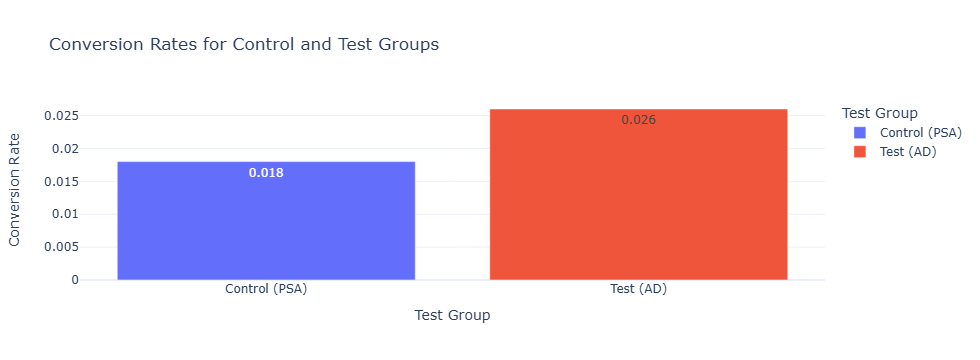

In [46]:
import plotly.express as px

# Calculate conversion rates for both groups and round to 3 significant figures
conversion_rates = pd.DataFrame({
    'Test Group': ['Control (PSA)', 'Test (AD)'],
    'Conversion Rate': [round(control_group['converted'].mean(), 3), 
                        round(test_group['converted'].mean(), 3)]
})

# Create the bar plot
fig = px.bar(conversion_rates, x='Test Group', y='Conversion Rate',
             title='Conversion Rates for Control and Test Groups', 
             color='Test Group', text='Conversion Rate',
             labels={'Test Group': 'Test Group', 'Conversion Rate': 'Conversion Rate'},
             template='plotly_white')  # Optional: choose a clean template

# Show the plot
fig.show()


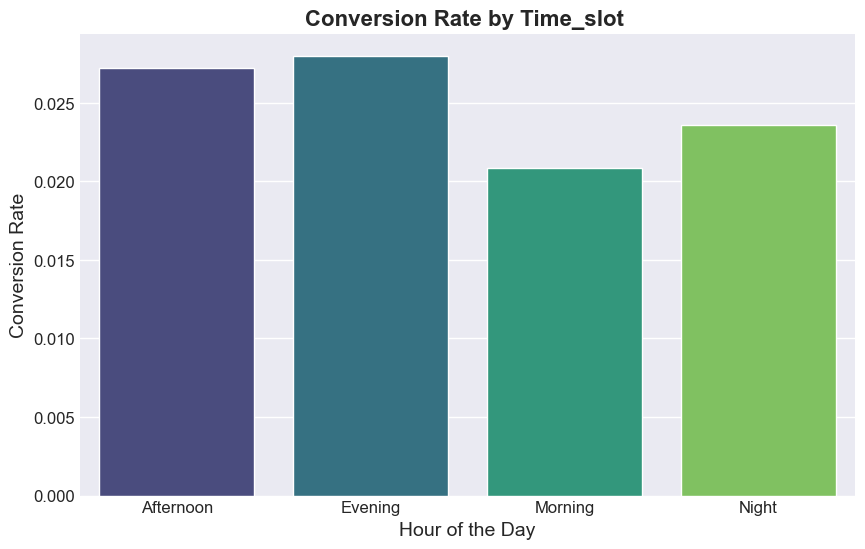

In [47]:

# Calculate conversion rate by hour
hour_conversion_rate = df_subset.groupby('time_slot')['converted'].mean().reset_index()

# Rename the column for clarity, if needed
hour_conversion_rate.columns = ['time_slot', 'Conversion Rate']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_conversion_rate, x='time_slot', y='Conversion Rate', palette='viridis')

# Customize the plot
plt.title('Conversion Rate by Time_slot ', fontsize=16, fontweight='bold')

plt.ylabel('Conversion Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


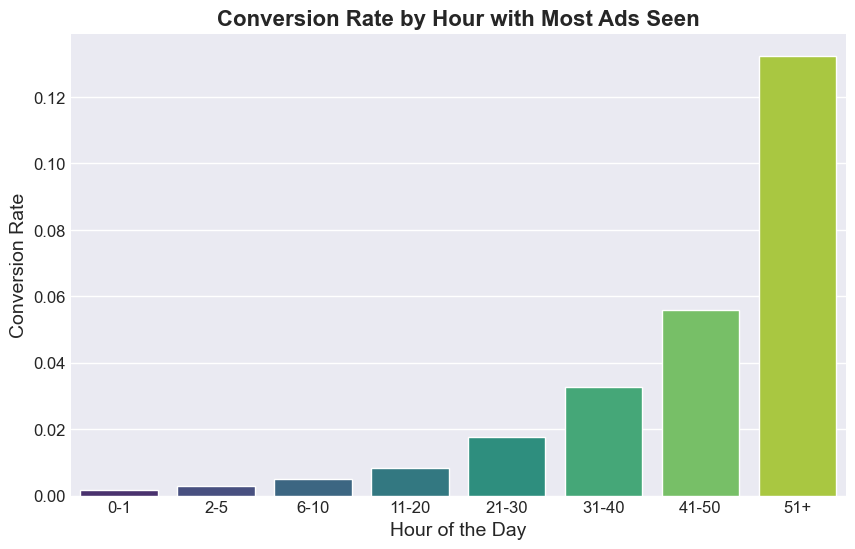

In [49]:

# Calculate conversion rate by hour
conversion_rate = df_subset.groupby('total_ads_bin')['converted'].mean().reset_index()

# Rename the column for clarity, if needed
conversion_rate.columns = ['total_ads_bin', 'Conversion Rate']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=conversion_rate, x='total_ads_bin', y='Conversion Rate', palette='viridis')

# Customize the plot
plt.title('Conversion Rate by Hour with Most Ads Seen', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Conversion Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [50]:
conversion_rate

,total_ads_bin,Conversion Rate
0,0-1,0.001572
1,2-5,0.002970
2,6-10,0.004931
3,11-20,0.008393
4,21-30,0.017693
5,31-40,0.032768
6,41-50,0.055702
7,51+,0.132352


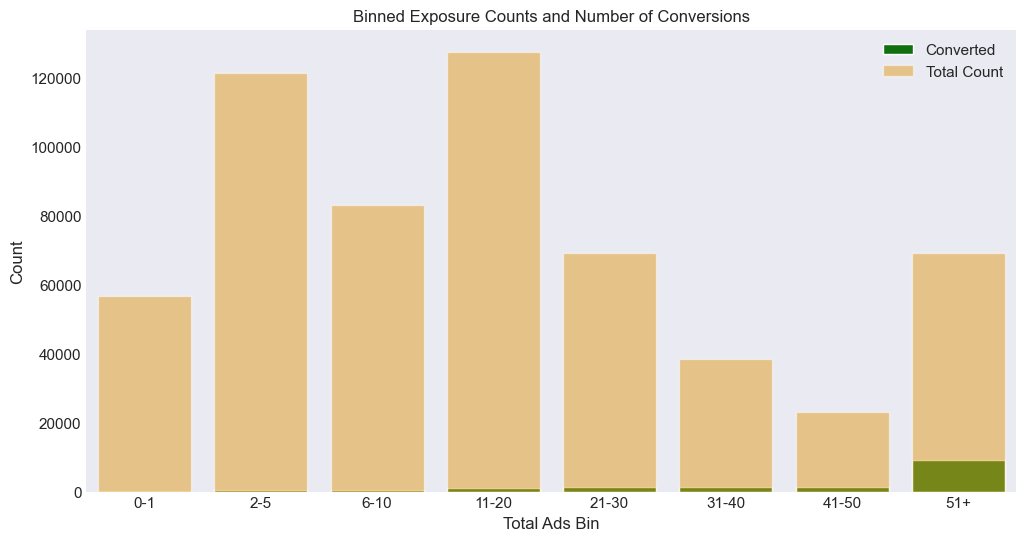

In [53]:

# Count conversions per bin
conversion_counts = df_subset.groupby('total_ads_bin')['converted'].agg(['count', 'sum']).reset_index()
conversion_counts.columns = ['Total Ads Bin', 'Total Count', 'Total Converted']

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(data=conversion_counts, x='Total Ads Bin', y='Total Converted', color='green', label='Converted')
sns.barplot(data=conversion_counts, x='Total Ads Bin', y='Total Count', alpha=0.5, color='orange', label='Total Count')

plt.title('Binned Exposure Counts and Number of Conversions')
plt.xlabel('Total Ads Bin')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y')
plt.show()

# Conclusion

`Statistical Significane`

    Non-parametric tests ( the Kruskal-Wallis test) show statistically significant differences (with p-values below your chosen significance level, e.g., 0.05), you can confidently conclude that the differences in conversion rates between the two groups are not due to random chance.
    
`Engagement Patterns`
    
    Analyze the conversion data in the context of user exposure to ads. If users exposed to ads have higher conversion rates, it could imply that increased visibility or engagement with ads leads to better outcomes.
    
`Effectiveness`
    
    If the conversion rates for the Ads group are significantly higher than those for the PSA group, it suggests that the ad campaign is more effective at driving conversions. This could indicate that the advertising strategy resonates better with your target audience.
